## **Importing Required Libraries**

In [2]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import SVR

In [3]:
#Load dataset
insurance = pd.read_csv("insurance.csv")
df = insurance.copy()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


## **Perform An Exploratory Data Analysis**

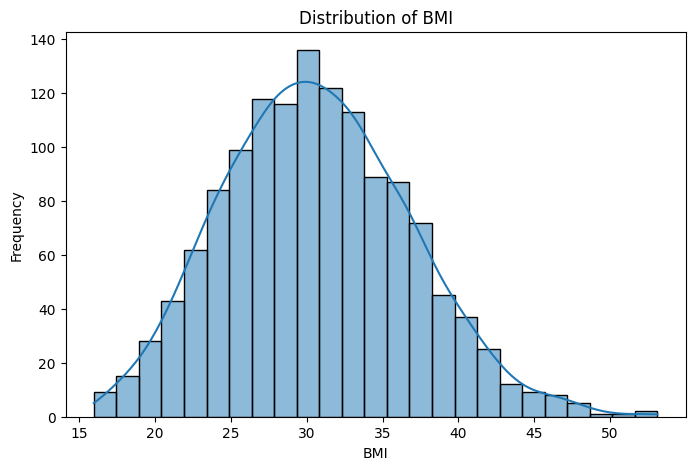

In [7]:
plt.figure(figsize=(8, 5))
sns.histplot(df['bmi'],kde = True,bins=25)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

<Axes: >

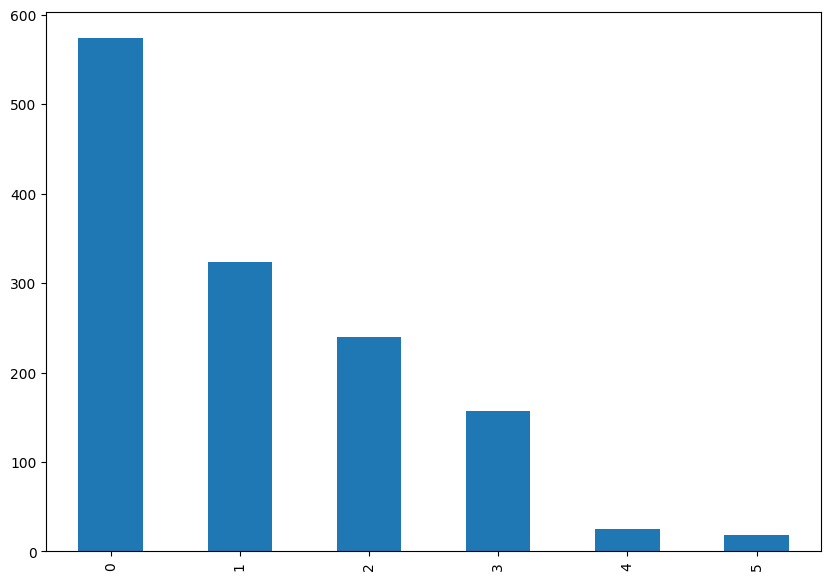

In [8]:
plt.figure(figsize=(10,7))
df["children"].value_counts().plot.bar()

<Axes: >

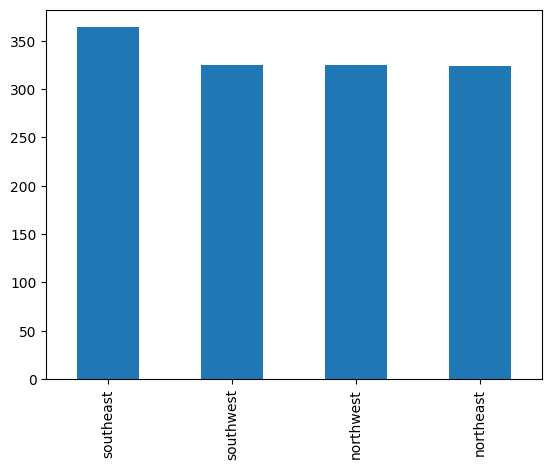

In [9]:
df["region"].value_counts().plot.bar()

In [10]:
df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

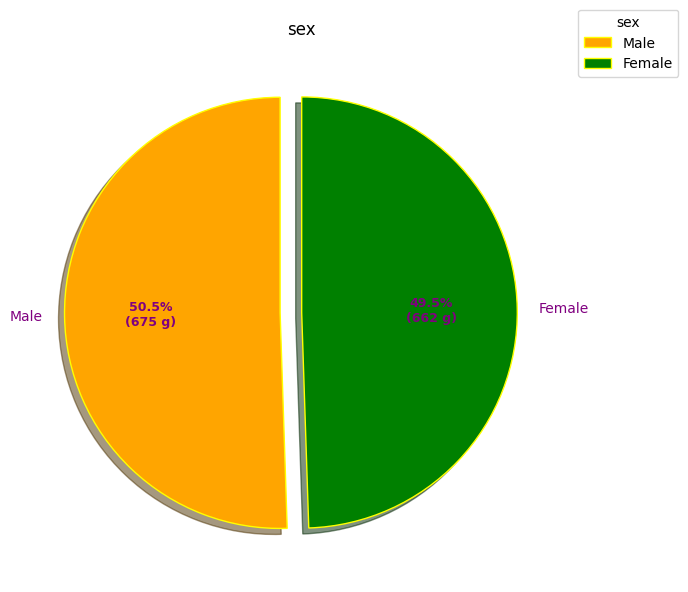

In [11]:
fig, ax = plt.subplots(figsize=(10,7))
sex= ["Male", "Female"]
data= list(df["sex"].value_counts().values)

explode = (0.1,0.0)

colors = ("orange","green")

wp = {
    "linewidth": 1,
    "edgecolor": "yellow"
}

def func(pct, allvalues):
  absolute = int(pct / 100 * np.sum(allvalues))
  return "{:.1f}%\n({:d} g)".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct,data),
                                    explode = explode,
                                    labels = sex,
                                    shadow = True,
                                    colors = colors,
                                    startangle =  90,
                                    wedgeprops = wp,
                                    textprops = dict(color="purple"))


ax.legend(wedges, sex,
          title="sex",
          loc="center left",
          bbox_to_anchor=(1,0.5,0.5,1))
plt.setp(autotexts, size=9, weight="bold")
ax.set_title("sex")

plt.show()

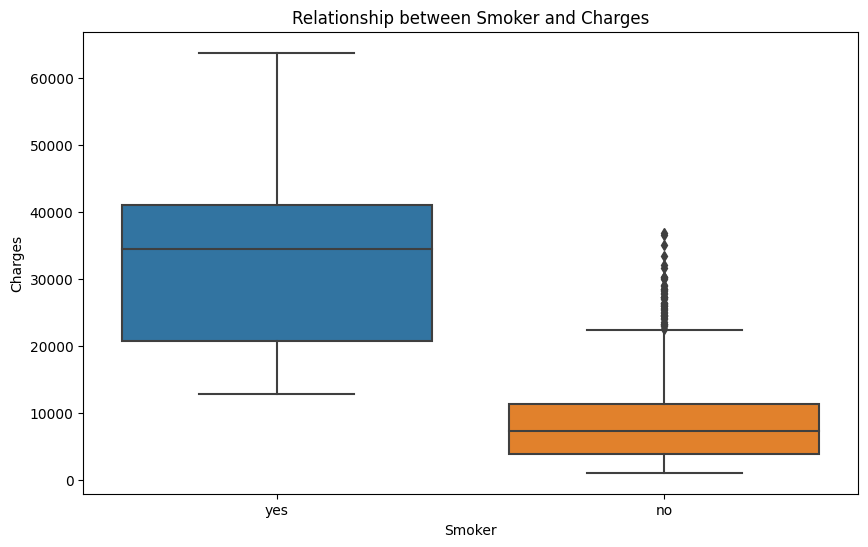

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Relationship between Smoker and Charges")
plt.xlabel("Smoker")
plt.ylabel("Charges")
plt.show()

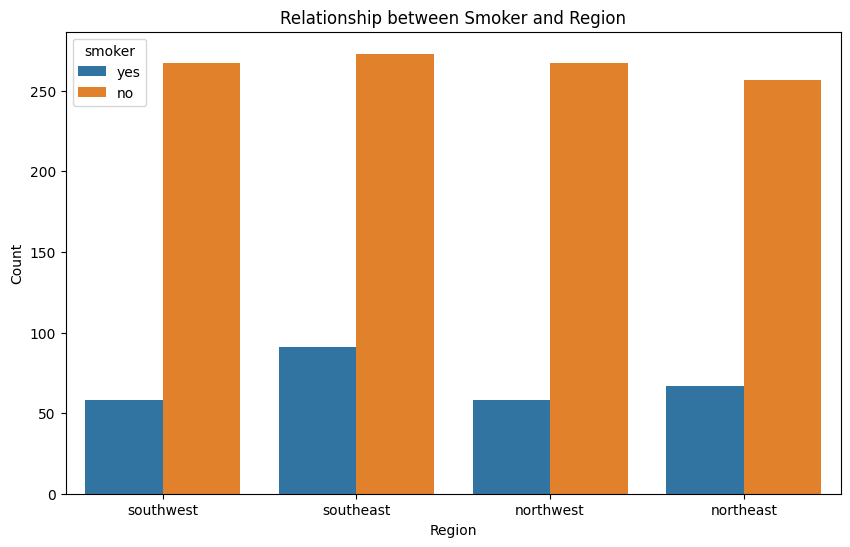

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='region', hue='smoker', data=df)
plt.title("Relationship between Smoker and Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()

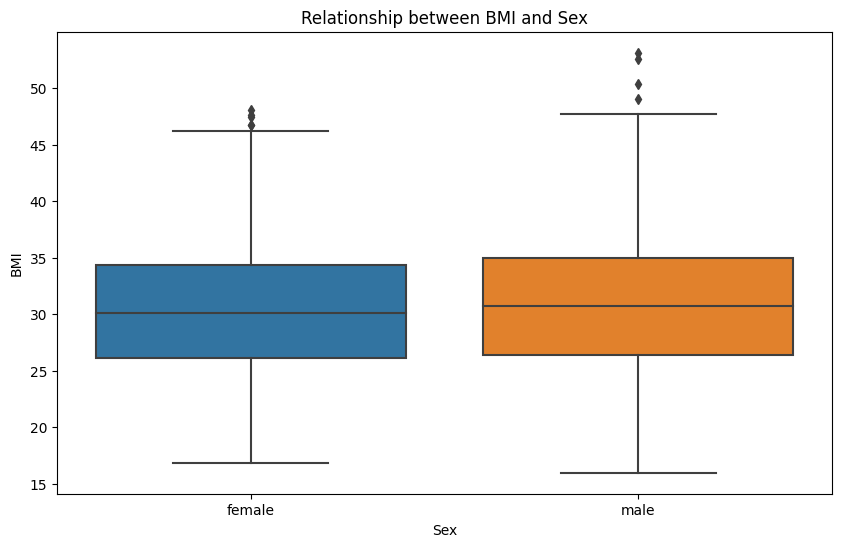

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='bmi', data=df)
plt.title("Relationship between BMI and Sex")
plt.xlabel("Sex")
plt.ylabel("BMI")
plt.show()

In [19]:
children_by_region = df.groupby("region")["children"].sum()
region_with_most_children = children_by_region.idxmax()
print(f"Region with the most children: {region_with_most_children}")

Region with the most children: southeast


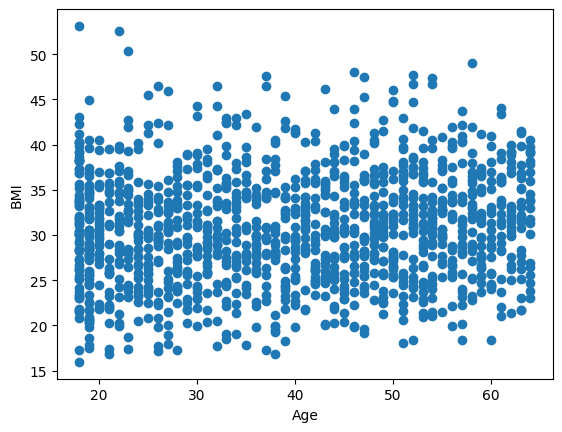

In [25]:
plt.scatter(df['age'], df['bmi'])
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

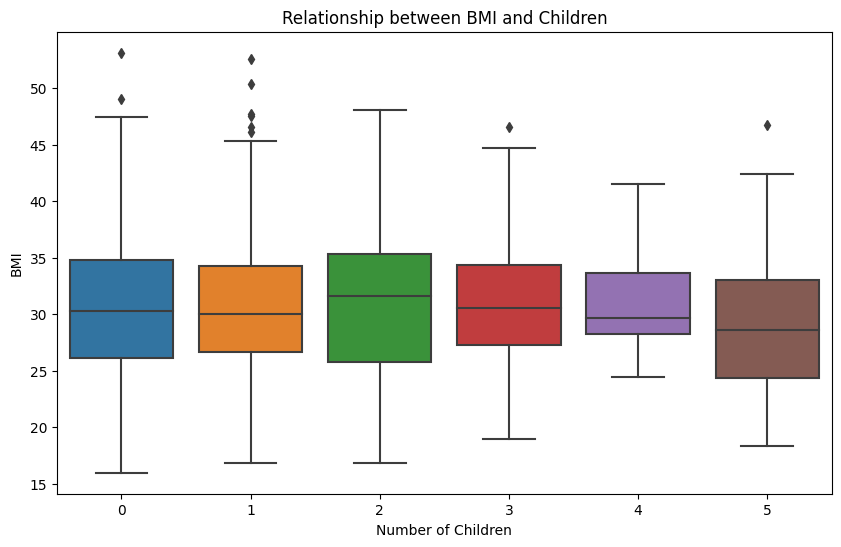

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='children', y='bmi', data=df)
plt.title("Relationship between BMI and Children")
plt.xlabel("Number of Children")
plt.ylabel("BMI")
plt.show()

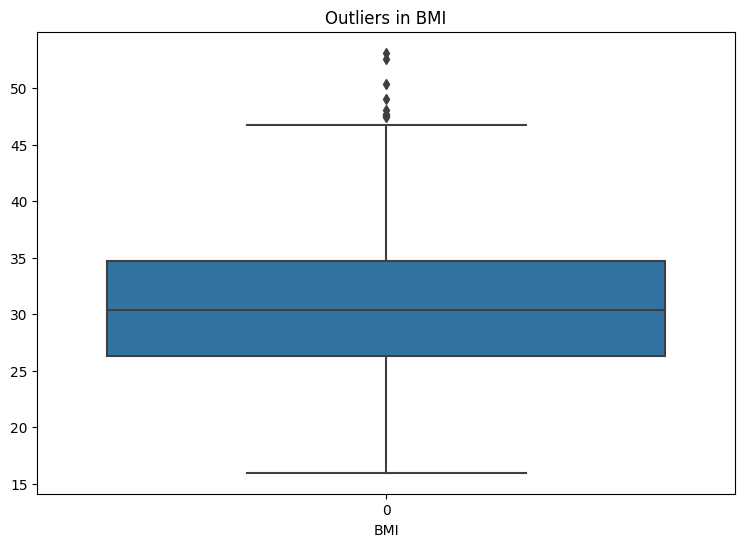

In [35]:
plt.figure(figsize=(9, 6))
sns.boxplot(df['bmi'])
plt.title("Outliers in BMI")
plt.xlabel("BMI")
plt.show()

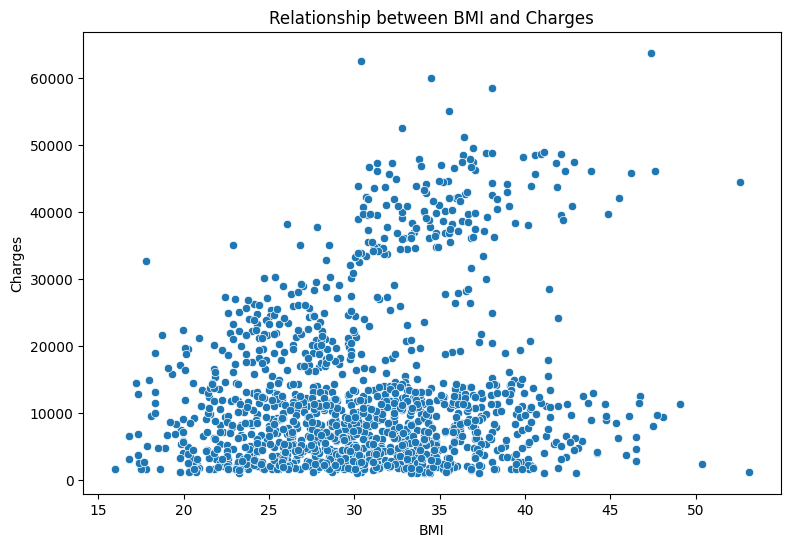

In [39]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title("Relationship between BMI and Charges")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()

<Axes: xlabel='region', ylabel='bmi'>

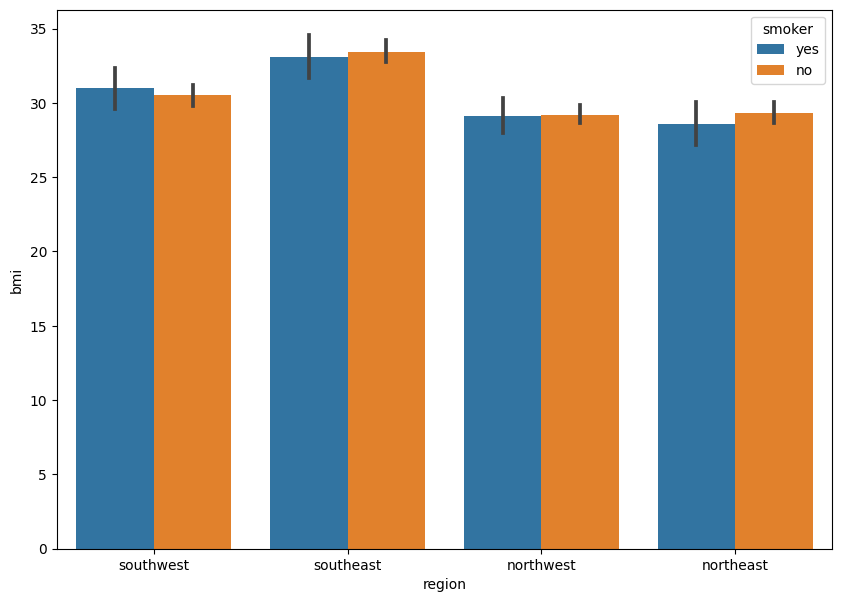

In [40]:
plt.figure(figsize=(10,7))

sns.barplot(x="region", y="bmi", hue="smoker", data=df)

## **Data Preprocessing**

In [41]:
#label encoding

def label_encoding(column_name):
  label_encoder = LabelEncoder()
  df[column_name]= label_encoder.fit_transform(df[column_name])

In [42]:
label_encoding("smoker")
label_encoding("sex")

In [43]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [44]:
#one hot encoding

one_hot = pd.get_dummies(df["region"])
one_hot.head()

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [45]:
df = pd.concat([df, one_hot], axis=1)
df.drop("region", axis=1, inplace=True)
df.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [46]:
X = df.drop("charges", axis=1)
y = df["charges"]

In [47]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X[0:5]

array([[0.02173913, 0.        , 0.3212268 , 0.        , 1.        ,
        0.        , 0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.47914985, 0.2       , 0.        ,
        0.        , 0.        , 1.        , 0.        ],
       [0.2173913 , 1.        , 0.45843422, 0.6       , 0.        ,
        0.        , 0.        , 1.        , 0.        ],
       [0.32608696, 1.        , 0.18146355, 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ],
       [0.30434783, 1.        , 0.34759214, 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ]])

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,
                                                    random_state=42)

In [49]:
X_train.shape

(1070, 9)

In [50]:
y_train.shape

(1070,)

In [51]:
X_test.shape

(268, 9)

In [52]:
y_test.shape

(268,)

## **Model Selection**

In [53]:
linreg = LinearRegression()
DecTree = DecisionTreeRegressor()
Rand_forest = RandomForestRegressor()
SVM = SVR()

In [54]:
linreg_scores = cross_val_score(linreg,
                                X_train, y_train,
                                scoring="neg_mean_squared_error",
                                cv=10)

In [55]:
linreg_scores

array([-36875998.62836598, -43307871.90469339, -27392943.335941  ,
       -36545076.53517248, -34064321.21101744, -37545462.85261904,
       -52992268.32309429, -39706839.29685257, -38357145.09175086,
       -32042446.75311643])

In [56]:
DecTree_scores = cross_val_score(DecTree,
                                X_train, y_train,
                                scoring="neg_mean_squared_error",
                                cv=10)

In [57]:
DecTree_scores

array([-40862661.21990232, -41614216.46118396, -49444567.99117129,
       -49830885.69308389, -52227767.70891936, -40050352.79590248,
       -58343240.54431821, -44806170.3459195 , -44635835.3432685 ,
       -35339728.34446558])

In [58]:
Rand_forest_scores = cross_val_score(Rand_forest,
                                X_train, y_train,
                                scoring="neg_mean_squared_error",
                                cv=10)

In [59]:
Rand_forest_scores

array([-23773828.8603966 , -28241619.51703263, -14441566.35731029,
       -20193410.36066262, -28013850.31381585, -23788873.44282602,
       -30660805.50793258, -28885332.66258831, -26495055.04242543,
       -22063289.27179395])

In [60]:
SVM_scores = cross_val_score(SVM,
                                X_train, y_train,
                                scoring="neg_mean_squared_error",
                                cv=10)

In [61]:
SVM_scores

array([-1.56939674e+08, -1.55688887e+08, -1.64428208e+08, -2.10106259e+08,
       -1.69069136e+08, -1.08552023e+08, -1.51800872e+08, -1.47702857e+08,
       -1.67329025e+08, -1.50282422e+08])

In [62]:
def score_display(scores):
  scores = np.sqrt(-scores)
  print(f"""
  RMSE Scores:{scores},
  Mean: {scores.mean()},
  Standart Deviation: {scores.std()}
  """)

In [63]:
score_display(linreg_scores)


  RMSE Scores:[6072.56112595 6580.87166754 5233.82683473 6045.25239632 5836.4647871
 6127.43525895 7279.57885616 6301.33631041 6193.3145481  5660.60480453],
  Mean: 6133.124658979258,
  Standart Deviation: 517.5126188634559
  


In [64]:
score_display(DecTree_scores)


  RMSE Scores:[6392.39088447 6450.90818887 7031.68315492 7059.0994959  7226.87814405
 6328.53480641 7638.27470993 6693.74113228 6681.00556378 5944.72273066],
  Mean: 6744.723881126604,
  Standart Deviation: 473.542407999529
  


In [78]:
score_display(Rand_forest_scores)


  RMSE Scores:[4875.84134898 5314.28447837 3800.20609406 4493.7078633  5292.81119197
 4877.38387282 5537.22001621 5374.507667   5147.33475135 4697.15757366],
  Mean: 4941.045485770044,
  Standart Deviation: 491.764823091182
  


In [79]:
score_display(SVM_scores)


  RMSE Scores:[12527.55657891 12477.53529947 12822.95627471 14495.04256846
 13002.65880912 10418.83021956 12320.74963324 12153.30642099
 12935.57208746 12258.97310757],
  Mean: 12541.318099949585,
  Standart Deviation: 951.4602172803403
  


## **Hyper-parameter Optimization**

In [65]:
params = {"n_estimators": [3, 10, 20, 50],
          "n_jobs": [2, 3, 4, 10]}

In [66]:
grid_s = GridSearchCV(Rand_forest, params, cv=5, scoring="neg_mean_squared_error")

In [67]:
grid_s.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [3, 10, 20, 50],
                         'n_jobs': [2, 3, 4, 10]},
             scoring='neg_mean_squared_error')

In [68]:
grid_s.best_params_

{'n_estimators': 20, 'n_jobs': 10}

In [69]:
for mean_score, params in zip((grid_s.cv_results_['mean_test_score']), grid_s.cv_results_["params"]):
  print(np.sqrt(-mean_score), "------------", params)

5517.344111435973 ------------ {'n_estimators': 3, 'n_jobs': 2}
5535.623110029991 ------------ {'n_estimators': 3, 'n_jobs': 3}
5717.630428986108 ------------ {'n_estimators': 3, 'n_jobs': 4}
5677.179776939812 ------------ {'n_estimators': 3, 'n_jobs': 10}
5137.389728990892 ------------ {'n_estimators': 10, 'n_jobs': 2}
5166.618196758912 ------------ {'n_estimators': 10, 'n_jobs': 3}
5126.046858825426 ------------ {'n_estimators': 10, 'n_jobs': 4}
5201.849980931937 ------------ {'n_estimators': 10, 'n_jobs': 10}
5049.9016921011325 ------------ {'n_estimators': 20, 'n_jobs': 2}
5091.084320958902 ------------ {'n_estimators': 20, 'n_jobs': 3}
5012.846569292115 ------------ {'n_estimators': 20, 'n_jobs': 4}
4950.37535312184 ------------ {'n_estimators': 20, 'n_jobs': 10}
4968.373788747861 ------------ {'n_estimators': 50, 'n_jobs': 2}
4954.500832748125 ------------ {'n_estimators': 50, 'n_jobs': 3}
4976.87664362713 ------------ {'n_estimators': 50, 'n_jobs': 4}
4967.401290069924 ---------

In [70]:
prediction = grid_s.best_estimator_.predict(X_test)

In [71]:
y_test[0:10].values

array([ 9095.06825,  5272.1758 , 29330.98315,  9301.89355, 33750.2918 ,
        4536.259  ,  2117.33885, 14210.53595,  3732.6251 , 10264.4421 ])

In [72]:
comparison = pd.DataFrame({"Y Test": y_test[0:10].values,
                         "Predictions": prediction[0:10]})

In [73]:
comparison

,Y Test,Predictions
0,9095.06825,8674.646297
1,5272.17580,5635.206809
2,29330.98315,28496.087265
3,9301.89355,11655.955039
4,33750.29180,35110.595448
5,4536.25900,7378.684053
6,2117.33885,2050.147147
7,14210.53595,15478.603843
8,3732.62510,7879.058720
9,10264.44210,11306.561047


In [74]:
def regression_evaluation(preds):
  mse = mean_squared_error(y_test, preds)
  rmse = np.sqrt(mse)
  r_squared = r2_score(y_test, preds)
  mae = mean_absolute_error(y_test, preds)

  print(f"Mean Absolute Error: {mae} \nMean Squared Error: {mse} \nRoot Mean Squared Error: {rmse} \nR-Squared Value: {r_squared}")

In [75]:
regression_evaluation(prediction)

Mean Absolute Error: 2775.1240830410447 
Mean Squared Error: 23074649.05819789 
Root Mean Squared Error: 4803.607920948367 
R-Squared Value: 0.851369806139636


In [76]:
from scipy import stats

confidence = 0.95

squared_errors = (prediction - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([3918.57865092, 5549.23773801])